## Example Code - CAPM Beta for a given return sample
## Single (Constant) Sample Date Window

First few rows of the dataset:
                  Term      0.25       0.5      0.75         1      1.25  \
0                 Date   ZC025YR   ZC050YR   ZC075YR   ZC100YR   ZC125YR   
1  2013-02-04 00:00:00   0.00973  0.010202  0.010485  0.010738  0.010989   
2  2013-02-05 00:00:00   0.00969  0.010172    0.0105  0.010795  0.011081   
3  2013-02-06 00:00:00  0.009689  0.010139  0.010445  0.010723  0.010995   
4  2013-02-07 00:00:00   0.00958  0.009983  0.010287  0.010573  0.010857   

        1.5      1.75         2      2.25  ...         28      28.25  \
0   ZC150YR   ZC175YR   ZC200YR   ZC225YR  ...   ZC2800YR   ZC2825YR   
1  0.011247  0.011515  0.011792  0.012077  ...   0.026692   0.026636   
2  0.011366  0.011655  0.011948  0.012246  ...   0.026998    0.02694   
3  0.011269  0.011547  0.011831  0.012121  ...   0.026746   0.026689   
4  0.011143  0.011434   0.01173  0.012031  ...   0.026789   0.026732   

        28.5      28.75         29      29.25       29.5      29.75  \
0   ZC28

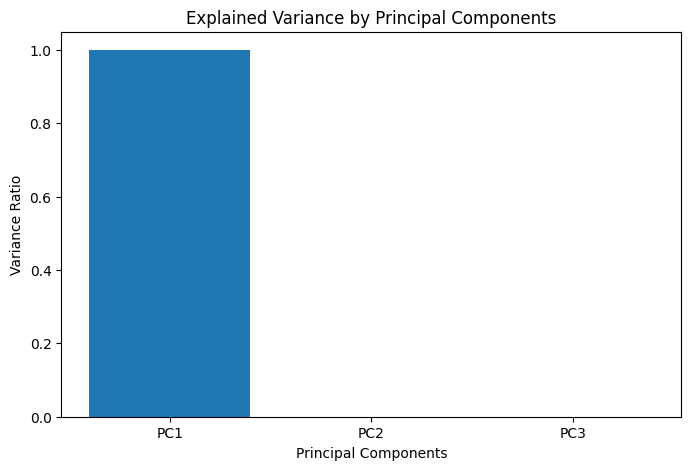

Explained variance ratios:
PC1: 100.00%
PC2: 0.00%
PC3: 0.00%


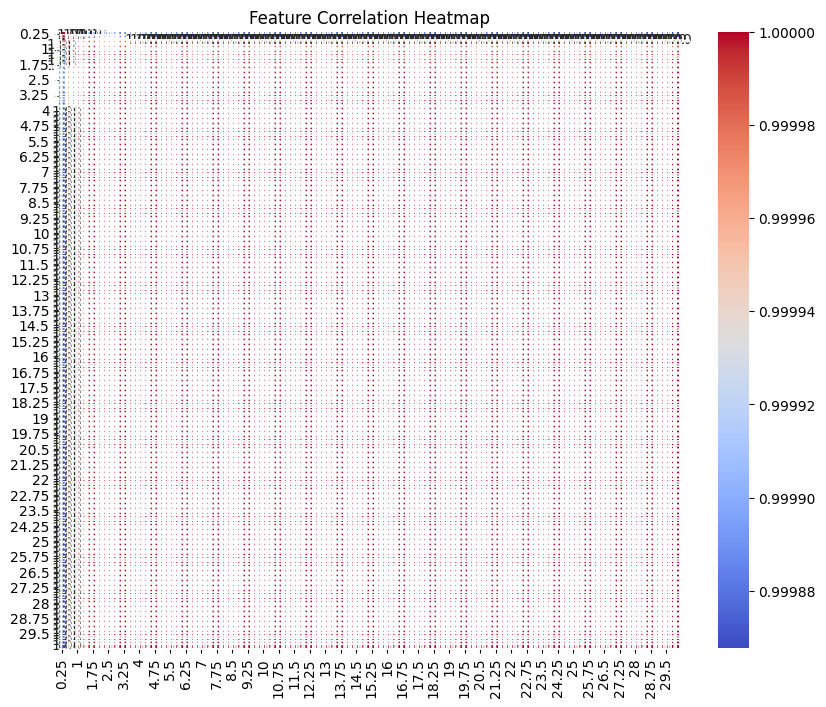

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data file
data_file = 'Canada Yield Curve Data.xlsx'
data = pd.read_excel(data_file)

# Display the dataset details
print("First few rows of the dataset:")
print(data.head())
print("\nData types of columns:")
print(data.dtypes)

# Clean and convert numeric columns stored as text
for col in data.columns:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True), errors='coerce')

# Save cleaned data for review
data_cleaned_file = 'Cleaned_Canada_Yield_Curve_Data.csv'
data.to_csv(data_cleaned_file, index=False)
print(f"Cleaned dataset saved to {data_cleaned_file}")

# Select numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Check for numeric columns
if data_numeric.empty:
    raise ValueError("No numeric columns found after cleaning.")

# Drop columns with near-zero variance
variance = data_numeric.var()
data_numeric = data_numeric.loc[:, variance > 1e-6]

if data_numeric.empty:
    raise ValueError("All columns have near-zero variance.")

# Drop rows with missing values
data_cleaned = data_numeric.dropna()

if data_cleaned.empty:
    raise ValueError("All rows have missing values after cleaning.")

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Apply PCA with 3 components
pca = PCA(n_components=min(3, data_scaled.shape[1]))  # Ensure n_components does not exceed features
pca_components = pca.fit_transform(data_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Save PCA results to a CSV file
output_file = 'PCA_Results.csv'
pca_df.to_csv(output_file, index=False)
print(f"PCA results saved to {output_file}")

# Explained variance plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, pca.n_components_ + 1), explained_variance, tick_label=[f'PC{i+1}' for i in range(pca.n_components_)])
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.show()

# Display explained variance ratios
print("Explained variance ratios:")
for i, variance in enumerate(explained_variance, 1):
    print(f"PC{i}: {variance:.2%}")

# Correlation heatmap to check feature dependency
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


Basic Statistics for Yield Terms:
       count      mean       std       min       25%       50%       75%  \
0.25  2476.0  0.009717  0.008188  0.000486  0.004610  0.009082  0.012521   
0.5   2476.0  0.010631  0.008778  0.000878  0.005002  0.009739  0.014639   
0.75  2476.0  0.011149  0.009045  0.001054  0.005214  0.009759  0.015946   
1.0   2476.0  0.011680  0.009365  0.001227  0.005363  0.009780  0.016634   
1.25  2476.0  0.011523  0.008722  0.001007  0.005441  0.009767  0.016356   
1.5   2476.0  0.011615  0.008674  0.001047  0.005308  0.009913  0.016201   
1.75  2476.0  0.011738  0.008587  0.001194  0.005238  0.010120  0.016024   
2.0   2476.0  0.011889  0.008473  0.001417  0.005297  0.010441  0.015892   
2.25  2476.0  0.012061  0.008344  0.001683  0.005393  0.010830  0.015825   
2.5   2476.0  0.012248  0.008207  0.001966  0.005564  0.011241  0.015888   

           max  
0.25  0.044439  
0.5   0.046356  
0.75  0.047075  
1.0   0.047878  
1.25  0.043165  
1.5   0.042939  
1.75  0.04

ValueError: could not convert string to float: ' '

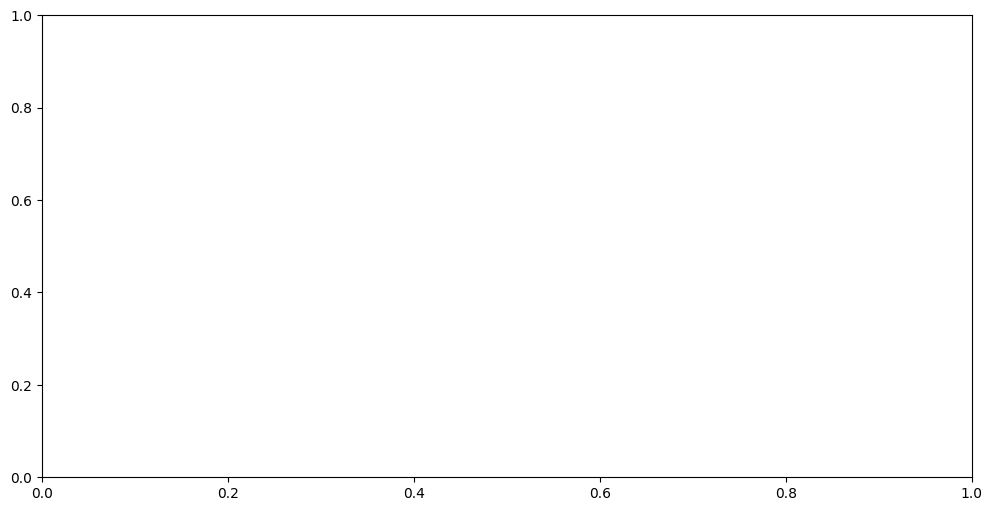

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Component 1: Data Loading
def load_yield_data(file_path):
    """
    Load yield curve data from Excel file and preprocess it.
    Returns DataFrame with dates as index and terms as columns.
    """
    # Read term values from first row
    first_row = pd.read_excel(file_path, sheet_name='data', nrows=1, header=None)
    terms = first_row.iloc[0, 1:].astype(float).tolist()
    
    # Create column names and load data
    columns = ['Date'] + terms
    df = pd.read_excel(file_path, sheet_name='data', 
                      skiprows=2, header=None, names=columns)
    
    # Convert and set datetime index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    return df

# Component 2: Data Analysis
def analyze_yield_curves(df):
    """
    Perform basic analysis on yield curve data.
    Returns statistics and identifies inversion periods.
    """
    # Basic statistics
    stats = df.describe().transpose()
    stats.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    
    # Calculate 10y-2y spread
    df['10y_2y_spread'] = df[10.0] - df[2.0]
    inversions = df[df['10y_2y_spread'] < 0]
    
    return stats, inversions

# Component 3: Data Visualization
def plot_yield_curve(df, date, save_path=None):
    """
    Plot yield curve for a specific date.
    """
    plt.figure(figsize=(12, 6))
    
    # Extract data for target date
    yields = df.loc[date].drop('10y_2y_spread', errors='ignore')
    
    # Create plot
    plt.plot(yields.index.astype(float), yields.values, marker='o', linestyle='-')
    plt.title(f'Canada Yield Curve - {date.strftime("%Y-%m-%d")}')
    plt.xlabel('Term to Maturity (Years)')
    plt.ylabel('Yield (%)')
    plt.grid(True)
    
    # Add inversion warning if needed
    if '10y_2y_spread' in df.columns and df.loc[date, '10y_2y_spread'] < 0:
        plt.annotate('Yield Curve Inversion (10y < 2y)', 
                    xy=(0.05, 0.95), xycoords='axes fraction',
                    color='red', fontsize=12)
    
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Load data
    yield_df = load_yield_data('Canada Yield Curve Data.xlsx')
    
    # Analyze data
    statistics, inversion_dates = analyze_yield_curves(yield_df)
    
    print("Basic Statistics for Yield Terms:")
    print(statistics.head(10))
    
    print("\nDates with Yield Curve Inversion (10y < 2y):")
    print(inversion_dates[['10y_2y_spread', 2.0, 10.0]].head())
    
    # Visualize first and last available curves
    print("\nPlotting yield curves...")
    plot_yield_curve(yield_df, yield_df.index[0])  # First date
    plot_yield_curve(yield_df, yield_df.index[-1])  # Last date